## IT 720: NLP, Assignment 1

When you submit the assignment, make sure that you:

- add your name to the file name
- shut down the kernel one last time, restart it, and run your code from start to finish.
- leave the output in each cell to allow the grader to see it
- if there is a bug that you cannot resolve, leave the error message in the output cell so the grader can see it


### IT 720, NLP: Assignment 1, 175 points total

All code should be in Python, using open source tools. While several constraints are imposed upon you by the following instructions, you still have a lot of room to make your own decisions. For example, you can choose which two classifier algorithms to use.    If you want to create a neural net you have the choice of open source software to use, whether it's Keras/Tensorflow, PyTorch or just scikit-learn's implementation of neural nets.  You should consult online documentation for all of the tools, if needed, including the movie review database.

If necessary, consult:
- https://www.nltk.org/index.html
- https://scikit-learn.org/stable/
- https://keras.io
- https://pytorch.org

### General Instructions:

#### Overview: Using open source tools (e.g. NLTK and others), you will import the NLTK movie review database, clean the data (see details below), build and evaluate some N-gram models. There are some questions for you to answer after these Language Models. Make sure you add a separate cell for your answers below.  Following that, you will build two classifiers of your choice to predict the sentiment of the movie reviews, either positive or negative.

#### The first two code cells of both Part 1 and Part 2 are provided to help you get started, and contain enough imports for you to complete the assignment. However, you may use different packages if you wish.

For Part 1, I suggest using:

- `from collections import defaultdict, Counter`, because those two utilities will facilitate counting data (i.e. word tokens) to help you easily estimate their probabilities.

For example:
- `ngram_counts   = defaultdict(Counter)` avoids dictionary update errors by creating a `Counter` object for a missing key and `defaultdict` ensures each unseen context gets a fresh `Counter`
- `context_counts = Counter()` elegantly keeps track of the counts for all of the context counts for each n-gram, e.g. if 'the black cat' trigram occurs 25 times, then the count of the context 'the black' will be 25 and 25 would be the denominator to estimate probabilities for all next words given 'the black' context

### Part 1, 100 points: 85 for your code and 15 for a few questions you have to answer

#### Detailed instructions:
Before building any models, you should first clean up the raw data. Some suggestions for cleaning the data include: removing punctuation and any html tags, lowercasing all of the text, tokenizing it into full words (no need to perform subword tokenization), and lemmatize the words using spaCy (or other package, if you prefer).  You may do more than this if you wish.  

After preprocessing the data, show 5 sentences of the text both before and after preprocessing.

Your next task is to split the texts into a training set and a test set. I suggest using 90% of the sentences for training. Then build three N-gram language models for bigrams, trigrams and 4-grams. After training each model, use it to generate 5 sentences of text. Also for each model, compute and display in the output the perplexity of the model. You will be asked a few questions that relate to the models as well as their perplexities.  You can find the perplexity equation in the textbook readings for Chapter 3 as well as in the corresponding class. Also, remember to add the special start symbol `<s>` as a prefix for each sentence of the N-gram models.  For each N-gram model you will need to prepend N-1 of such symbols in order to obtain a context in front of the very first word of each sentence.  You will also need to terminate each sentence with a single `</s>` symbol.

### Part 2, 75 points

#### Detailed Instructions:
Build two classifiers of your choice.  Download the movie review data again, and use TfidfVectorizer from the scikit-learn package to vectorize the reviews.  We cover TF-IDF in Week 3 during class, and you can quickly read the short Jurafsky and Martin section 11.1.1 for an overview.

The movie review data only has two categories 'positive' and 'negative'.

For Part 2, you should use:

`from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix)` to show the accuracy, precision, recall, f1-score and a simple confusion matrix for each classifier.

## Grading Rubric:

### Part 1: 100 points
  
- 20 points: Data Cleaning, for example remove any HTML and punctuation from texts. Lowercase the text. Tokenize by full word, and lemmatize the words to create dictionary-like tokens separated by spaces.
- 5 points: Display 5 movie reviews before and after the data cleaning processes.
- 5 points: Randomize the reviews and split into 90% training and 10% test sets.
- 30 points: Build bigram, trigram and 4-gram language models.  
- 5 points: Use each language model to generate 5 sentences from each model.
- 20 points: Calculate and display the Perplexity scores using the test set sentences.
- 5 points each: Read and respond with your thoughts on each of the following three points:

1. How the number of possible contexts grows as N increases and why higher‑order models (i.e. larger N) require more data to estimate probabilities reliably

2. How data sparsity (i.e. how fewer and fewer examples of each N-gram will be found in the data as N becomes larger) affects the conditional probabilities in your model

3. Why smoothing becomes more important for larger N

### Part 2: 75 points
- 5 points:  Create train/test splits
- 10 points: TF-IDF vectorizer
- 15 points: Define and fit classifier model  1
- 5 points: Predict test categories with model 1
- 10 points: Compute and display overall accuracy, classification report and show confusion matrix of model 1 predictions
- 15 points: 15 points: Define and fit classifier model  2
- 5 points: Predict test categories with model 2
- 10 points: Compute and display overall accuracy, classification report and show confusion matrix of model 2 predictions

In [94]:
# ---------------------------------------------------------
# NLP Assignment 1 Part 1  (100 points)
# ---------------------------------------------------------
# Part 1 demonstrates:
# 1. Downloading a small English corpus (NLTK Movie Reviews)
# 2. Preprocessing: tokenization, lowercasing, HTML removal,
#    punctuation removal, and lemmatization
# 3. Showing before/after samples
# 4. Training N-gram language models (N=2, 3, and 4)
# 5. Generating text from the model
# 6. Computing Perplexity for each model
# ---------------------------------------------------------

import nltk
import random
import re
import spacy   #  spaCy for lemmatization
import string
import numpy  as np
import pandas as pd

# For movie review data
from nltk.corpus import movie_reviews

# Preprocessing utilities
from bs4         import BeautifulSoup # To clean html
from nltk        import word_tokenize

# LM utilities
from collections import defaultdict, Counter # See comments below on usefulness of these utils
from math        import log, exp             # to compute perplexity
from nltk.util   import ngrams               # to build the N-Gram models

# Download required NLTK resources
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Load spaCy English model
# If you get an error trying to run the next line of code
# then do this first (or do it in a terminal window):
# !python3 -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

'Ready'

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'Ready'

In [95]:
# Load raw sentences from the corpus
fileids = movie_reviews.fileids()
sentences_raw = []
reviews = []

for fid in fileids:
    raw_text = movie_reviews.raw(fid)
    reviews.append(raw_text)
    # Split into sentences using NLTK's sentence tokenizer
    sents = nltk.sent_tokenize(raw_text)
    sentences_raw.extend(sents)

print(f"Total reviews loaded: {len(reviews)}")
print(f"Total sentences loaded: {len(sentences_raw)}")


Total reviews loaded: 2000
Total sentences loaded: 71532


In [96]:
fileids[1]

'neg/cv001_19502.txt'

In [97]:
sentences_raw[0:6]

['plot : two teen couples go to a church party , drink and then drive .',
 'they get into an accident .',
 'one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares .',
 "what's the deal ?",
 'watch the movie and " sorta " find out .',
 '.']

In [98]:
# Clean the data. This cell will likely be the slowest of your program.

nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    """
    Clean text by removing HTML, punctuation, lowercasing, tokenizing, and lemmatizing.
    """
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Lowercase
    text = text.lower()

    # Remove punctuation and keep only alphabetic characters and spaces
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token]

    # Join tokens with spaces
    return ' '.join(lemmatized_tokens)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [99]:
# Example usage:
example_text = "<p>Hello, <b>world</b>! This is a test... <em>How are you?</em></p>"
cleaned_example = clean_text(example_text)
print(f"Original: {example_text}")
print(f"Cleaned:  {cleaned_example}")

Original: <p>Hello, <b>world</b>! This is a test... <em>How are you?</em></p>
Cleaned:  hello world this is a test how are you


In [100]:
len(reviews)

2000

In [101]:
# Display 5 sentences both before and after preprocessing

print("\n" + "=" * 80)
print("SAMPLE REVIEWS: BEFORE AND AFTER CLEANING")
print("=" * 80)

sample_indices = random.sample(range(len(reviews)), 5)

for i, idx in enumerate(sample_indices, 0):
    print(f"\n--- Review {i} (Original) ---")
    print(reviews[idx][:300] + "...")

    cleaned = clean_text(reviews[idx])
    print(f"\n--- Review {i} (Cleaned) ---")
    print(cleaned[:300] + "...")
    print("-" * 80)

# Clean all reviews
print("\n[2] Cleaning all reviews...")
cleaned_reviews = [clean_text(review) for review in reviews]



SAMPLE REVIEWS: BEFORE AND AFTER CLEANING

--- Review 0 (Original) ---
arriving in a barrage of hype , the blair witch project is one of the biggest box office success of the year . 
however , like the golden child , although blair witch has made a lot of money , it's not very good . 
donahue , williams and leonard play themselves as three students who set out to make ...

--- Review 0 (Cleaned) ---
arriving in a barrage of hype the blair witch project is one of the biggest box office success of the year however like the golden child although blair witch ha made a lot of money it not very good donahue williams and leonard play themselves a three student who set out to make a documentary about t...
--------------------------------------------------------------------------------

--- Review 1 (Original) ---
in 1989 , director edward zwick began his career with the powerful civil war drama , " glory , " but since then , he has made continuous disappointments , to me at least , with 1994'

In [102]:
cleaned_reviews[0]

'plot two teen couple go to a church party drink and then drive they get into an accident one of the guy dy but his girlfriend continues to see him in her life and ha nightmare whats the deal watch the movie and sorta find out critique a mindfuck movie for the teen generation that touch on a very cool idea but present it in a very bad package which is what make this review an even harder one to write since i generally applaud film which attempt to break the mold mess with your head and such lost highway memento but there are good and bad way of making all type of film and these folk just didnt snag this one correctly they seem to have taken this pretty neat concept but executed it terribly so what are the problem with the movie well it main problem is that it simply too jumbled it start off normal but then downshift into this fantasy world in which you a an audience member have no idea whats going on there are dream there are character coming back from the dead there are others who loo

In [103]:
len(cleaned_reviews)

2000

In [104]:
# Split processed sentences into train/test
print("\n[3] Randomizing and splitting data (90% train, 10% test)...")
random.seed(42)
random.shuffle(cleaned_reviews)

split_idx = int(len(cleaned_reviews) * 0.9)
train_reviews = cleaned_reviews[:split_idx]
test_reviews = cleaned_reviews[split_idx:]

print(f"Training set size: {len(train_reviews)}")
print(f"Test set size: {len(test_reviews)}")



[3] Randomizing and splitting data (90% train, 10% test)...
Training set size: 1800
Test set size: 200


In [105]:
# Define function to generate sentences for a given N-Gram model

class NgramModel:
    def __init__(self, n):
        self.n = n
        self.ngrams = defaultdict(Counter)
        self.context_counts = defaultdict(int)

    def train(self, texts):
        """Train the n-gram model on a list of texts."""
        for text in texts:
            tokens = ['<START>'] * (self.n - 1) + text.split() + ['<END>']

            for i in range(len(tokens) - self.n + 1):
                context = tuple(tokens[i:i + self.n - 1])
                word = tokens[i + self.n - 1]
                self.ngrams[context][word] += 1
                self.context_counts[context] += 1

    def get_probability(self, context, word):
        """Get probability of a word given context."""
        context = tuple(context)
        if self.context_counts[context] == 0:
            return 1e-10  # Smoothing for unseen contexts
        return (self.ngrams[context][word] + 1) / (self.context_counts[context] + len(self.ngrams[context]))

    def generate_sentence(self, max_length=20):
        """Generate a sentence using the n-gram model."""
        context = ['<START>'] * (self.n - 1)
        sentence = []

        for _ in range(max_length):
            context_tuple = tuple(context[-(self.n-1):])

            if context_tuple not in self.ngrams or len(self.ngrams[context_tuple]) == 0:
                break

            # Get possible next words and their counts
            possible_words = list(self.ngrams[context_tuple].keys())
            counts = [self.ngrams[context_tuple][word] for word in possible_words]

            # Normalize to probabilities
            total = sum(counts)
            probs = [c / total for c in counts]

            # Sample next word
            next_word = np.random.choice(possible_words, p=probs)

            if next_word == '<END>':
                break

            sentence.append(next_word)
            context.append(next_word)

        return ' '.join(sentence)



In [106]:
#  Perplexity Evaluation for N-gram Language Model
# Note that in Jurafsky and Martin (and elsewhere) you can find Perplexity defined in the first part of Chapter 3.

def calculate_perplexity(mod, test_texts):
        """Calculate perplexity on test set."""
        total_log_prob = 0
        total_words = 0

        for text in test_texts:
            tokens = ['<START>'] * (mod.n - 1) + text.split() + ['<END>']

            for i in range(len(tokens) - mod.n + 1):
                context = tokens[i:i + mod.n - 1]
                word = tokens[i + mod.n - 1]

                prob = mod.get_probability(context, word)
                total_log_prob += np.log2(prob)
                total_words += 1

        # Perplexity = 2^(-average log probability)
        avg_log_prob = total_log_prob / total_words
        perplexity = 2 ** (-avg_log_prob)

        return perplexity

In [107]:
# Build Bigram, Trigram and 4-gram language models using training data

print("\n[4] Building n-gram models...")

# Build models
bigram_model = NgramModel(2)
trigram_model = NgramModel(3)
fourgram_model = NgramModel(4)

print("Training bigram model...")
bigram_model.train(train_reviews)

print("Training trigram model...")
trigram_model.train(train_reviews)

print("Training 4-gram model...")
fourgram_model.train(train_reviews)

print("All models trained successfully!")


[4] Building n-gram models...
Training bigram model...
Training trigram model...
Training 4-gram model...
All models trained successfully!


In [108]:
# Display 5 random sentences generated from each model

print("\n[4] Building n-gram models...")
print("\n" + "=" * 80)
print("GENERATED SENTENCES FROM EACH MODEL")
print("=" * 80)

np.random.seed(42)

print("\n--- BIGRAM MODEL (5 sentences) ---")
for i in range(5):
    sentence = bigram_model.generate_sentence(max_length=15)
    print(f"{i+1}. {sentence}")

print("\n--- TRIGRAM MODEL (5 sentences) ---")
for i in range(5):
    sentence = trigram_model.generate_sentence(max_length=15)
    print(f"{i+1}. {sentence}")

print("\n--- 4-GRAM MODEL (5 sentences) ---")
for i in range(5):
    sentence = fourgram_model.generate_sentence(max_length=15)
    print(f"{i+1}. {sentence}")



[4] Building n-gram models...

GENERATED SENTENCES FROM EACH MODEL

--- BIGRAM MODEL (5 sentences) ---
1. after swearing sex flick but the role well deserved of a rubin carter investigation although
2. the street moverandshaker steven seagal right of the summer wa pure torture ruled by the
3. plot device in truman had chosen to the message which is probably not included when
4. for the latest from the denouement
5. living human life written and you are immune to move after losing his dream and

--- TRIGRAM MODEL (5 sentences) ---
1. written by michael rappaport despite the theme is reiterated when they do it again we
2. a big car chase through chinatown have you ever wondered if phantom menace wa exciting
3. let me tell you sorry youre gon na be quite respectable for a film that
4. curdled is angela jones the chase when his partnerincrime gregg henry his sometime partner with
5. big courtroom climax no joke there is frank langella langella ha always seems like a

--- 4-GRAM MODEL (5 s

In [109]:
# Compute and display perplexity of each model

print("\n" + "=" * 80)
print("PERPLEXITY SCORES ON TEST SET")
print("=" * 80)

print("\nCalculating perplexity scores...")

bigram_perplexity = calculate_perplexity(bigram_model,test_reviews)
trigram_perplexity = calculate_perplexity(trigram_model,test_reviews)
fourgram_perplexity = calculate_perplexity(fourgram_model,test_reviews)

print(f"\nBigram Model Perplexity:  {bigram_perplexity:.2f}")
print(f"Trigram Model Perplexity: {trigram_perplexity:.2f}")
print(f"4-gram Model Perplexity:  {fourgram_perplexity:.2f}")

print("\n" + "=" * 80)
print("ANALYSIS SUMMARY")
print("=" * 80)
print(f"Total reviews processed: {len(reviews)}")
print(f"Training set: {len(train_reviews)} reviews")
print(f"Test set: {len(test_reviews)} reviews")
print(f"\nPerplexity Comparison:")
print(f"  Lower perplexity = better model performance")
print(f"  Bigram:  {bigram_perplexity:.2f}")
print(f"  Trigram: {trigram_perplexity:.2f}")
print(f"  4-gram:  {fourgram_perplexity:.2f}")
print("=" * 80)


PERPLEXITY SCORES ON TEST SET

Calculating perplexity scores...

Bigram Model Perplexity:  174.99
Trigram Model Perplexity: 6022.77
4-gram Model Perplexity:  14317963.79

ANALYSIS SUMMARY
Total reviews processed: 2000
Training set: 1800 reviews
Test set: 200 reviews

Perplexity Comparison:
  Lower perplexity = better model performance
  Bigram:  174.99
  Trigram: 6022.77
  4-gram:  14317963.79


**Your perplexity values likely increased as N increased (for example, from bigram → trigram → 4‑gram). Using your own results, write a short explanation addressing the following points (5 points each):**

A. How the number of possible contexts grows as N increases and why higher‑order models (i.e. larger N) require more data to estimate probabilities reliably

B. How data sparsity affects the conditional probabilities in your model

C. Why smoothing becomes more important for larger N

Your explanations should connect your numerical results to the underlying concepts of N‑gram modeling.


**A. How the number of possible contexts grows as N increases and why higher‑order models (i.e. larger N) require more data to estimate probabilities reliably**

In an N‑gram model, the probability of the next word (or event) depends on the previous N-1 items.
If the vocabulary size is V, then the number of possible contexts is:
$ V^{(N-1)} $

Example:
- Bigram (N=2): contexts = $V^1=V$
- Trigram (N=3): contexts = $V^2$
- 4‑gram (N=4): contexts = $V^3$

As N increases, the number of possible contexts grows exponentially. Even with a modest vocabulary, this quickly becomes enormous.


**B. How data sparsity affects the conditional probabilities in your model**

Data sparsity means that many possible word sequences (contexts) never appear in the training corpus.Since the number of possible contexts grows exponentially with N, most of them will be rare or unseen.

In an n‑gram model, we estimate:

$P(w_i\mid w_{i-N+1},\dots ,w_{i-1})=\frac{\mathrm{Count}(w_{i-N+1},\dots ,w_{i-1},w_i)}{\mathrm{Count}(w_{i-N+1},\dots ,w_{i-1})}$

- **Problem 1: Zero counts**
If a context never appears, the denominator is zero → probability is undefined.If the numerator is zero, probability becomes 0 → the model says the sequence is impossible.

- **Problem 2: Unreliable estimates**
Rare contexts (appearing only once or twice) lead to unstable probabilities.

- **Problem 3: Sentence probability collapse**
Since sentence probability is the product of conditional probabilities, a single zero probability makes the entire sentence probability = 0.


**C. Why smoothing becomes more important for larger N**

1. **Explosion of Contexts**
- Number of possible contexts = $V^{(N-1)}$, where V is vocabulary size.
- As N grows, the number of possible contexts grows exponentially.
- Example with V=10,000:
  - Bigram: $10^4$=10,000 contexts
  - Trigram: $10^8$=100,000,000 contexts
  - 5‑gram: $10^{16}$ contexts
- Most of these contexts will never appear in training data.
2. **Data Sparsity Becomes Severe**
- With larger N, the chance of seeing the same context multiple times drops dramatically.
- Many contexts have zero counts, so raw probability estimates collapse to 0.
- Even frequent words may appear in rare contexts, making estimates unreliable.
3. **Sentence Probability Collapse**
- Sentence probability is the product of conditional probabilities.
- A single zero probability (from an unseen context) makes the entire sentence probability = 0.
- Larger N → more chances for unseen contexts → more zeros.
4. **Overfitting Risk**
- Larger N models memorize rare sequences instead of generalizing.
- Without smoothing, they fail to assign probability to plausible but unseen sequences.



In [110]:
# ---------------------------------------------------------
# NLP Assignment 1 Part 2
# ---------------------------------------------------------

import nltk
from nltk.corpus import movie_reviews
import random
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Ensure corpus is downloaded
nltk.download('movie_reviews')

'Movie Reviews Ready'

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


'Movie Reviews Ready'

In [111]:
# Collect documents and labels
documents = []
labels = []

for category in movie_reviews.categories():
    for fid in movie_reviews.fileids(category):
        raw_text = movie_reviews.raw(fid)
        cleaned = clean_text(raw_text)
        documents.append(cleaned)
        labels.append(category)

# Convert to DataFrame for convenience
df = pd.DataFrame({"text": documents, "label": labels})

print(df.head())
print(df['label'].value_counts())


                                                text label
0  plot two teen couple go to a church party drin...   neg
1  the happy bastard quick movie review damn that...   neg
2  it is movie like these that make a jaded movie...   neg
3  quest for camelot is warner bros first feature...   neg
4  synopsis a mentally unstable man undergoing ps...   neg
label
neg    1000
pos    1000
Name: count, dtype: int64


In [112]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nDistribution of labels in training set:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of labels in test set:")
print(y_test.value_counts(normalize=True))

X_train shape: (1600,)
X_test shape: (400,)
y_train shape: (1600,)
y_test shape: (400,)

Distribution of labels in training set:
label
pos    0.5
neg    0.5
Name: proportion, dtype: float64

Distribution of labels in test set:
label
neg    0.5
pos    0.5
Name: proportion, dtype: float64


In [113]:
X_train.head(5)

,text
1478,saving private ryan dreamworks running time ho...
1488,it ha happened again a movie that is well scri...
499,the best thing in fact the only good thing i c...
605,a fullyloaded entertainment review website com...
1511,im an avid fan of the alien saga so this revie...


In [114]:
y_train.head(5)

,label
1478,pos
1488,pos
499,neg
605,neg
1511,pos


In [115]:
# TF-IDF vectorizer: convert text to weighted word features
print("\n[1] Performing TF-IDF Vectorization...")

tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting features to 5000 for demonstration

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")
print("TF-IDF Vectorization complete.")


[1] Performing TF-IDF Vectorization...
X_train_tfidf shape: (1600, 5000)
X_test_tfidf shape: (400, 5000)
TF-IDF Vectorization complete.


In [116]:
# Display top features by average TF-IDF score
print(f"TF-IDF vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")
print(f"Training matrix shape: {X_train_tfidf.shape}")
print(f"Test matrix shape: {X_test_tfidf.shape}")

feature_names = tfidf_vectorizer.get_feature_names_out()
avg_tfidf = X_train_tfidf.mean(axis=0).A1
top_indices = avg_tfidf.argsort()[-20:][::-1]
print(f"\nTop 20 features by average TF-IDF score:")
for idx in top_indices:
    print(f"  {feature_names[idx]}: {avg_tfidf[idx]:.4f}")

TF-IDF vocabulary size: 5000
Training matrix shape: (1600, 5000)
Test matrix shape: (400, 5000)

Top 20 features by average TF-IDF score:
  the: 0.3476
  and: 0.1636
  of: 0.1557
  to: 0.1461
  is: 0.1162
  in: 0.0993
  it: 0.0853
  that: 0.0703
  film: 0.0540
  with: 0.0511
  his: 0.0485
  this: 0.0477
  for: 0.0475
  he: 0.0462
  but: 0.0411
  movie: 0.0408
  on: 0.0368
  are: 0.0356
  her: 0.0337
  by: 0.0315


In [117]:
# Define and fit first classifier model
# ============================================================================
# MODEL 1: MULTINOMIAL NAIVE BAYES
# ============================================================================

print("\n" + "=" * 80)
print("MODEL 1: MULTINOMIAL NAIVE BAYES")
print("=" * 80)

print("\n[7] Training Multinomial Naive Bayes classifier...")

# Define the model
nb_classifier = MultinomialNB(alpha=1.0)  # alpha is the smoothing parameter

# Fit the model
nb_classifier.fit(X_train_tfidf, y_train)

print("Multinomial Naive Bayes model trained successfully!")
print(f"Number of classes: {len(nb_classifier.classes_)}")
print(f"Classes: {nb_classifier.classes_} (0=negative, 1=positive)")

# ============================================================================
# PREDICT WITH MODEL 1 - Naive Bayes
# ============================================================================

print("\n[8] Making predictions with Naive Bayes...")

# Predict on test set
y_pred_nb = nb_classifier.predict(X_test_tfidf)

print(f"Predictions made for {len(y_pred_nb)} test samples")





MODEL 1: MULTINOMIAL NAIVE BAYES

[7] Training Multinomial Naive Bayes classifier...
Multinomial Naive Bayes model trained successfully!
Number of classes: 2
Classes: ['neg' 'pos'] (0=negative, 1=positive)

[8] Making predictions with Naive Bayes...
Predictions made for 400 test samples



[9] Evaluating Multinomial Naive Bayes performance...

Overall Accuracy: 0.8125 (81.25%)

Classification Report:
              precision    recall  f1-score   support

    Negative     0.7990    0.8350    0.8166       200
    Positive     0.8272    0.7900    0.8082       200

    accuracy                         0.8125       400
   macro avg     0.8131    0.8125    0.8124       400
weighted avg     0.8131    0.8125    0.8124       400

Confusion Matrix:
[[167  33]
 [ 42 158]]

Confusion Matrix Interpretation:
True Negatives:  167 (Correctly predicted negative)
False Positives: 33 (Incorrectly predicted positive)
False Negatives: 42 (Incorrectly predicted negative)
True Positives:  158 (Correctly predicted positive)


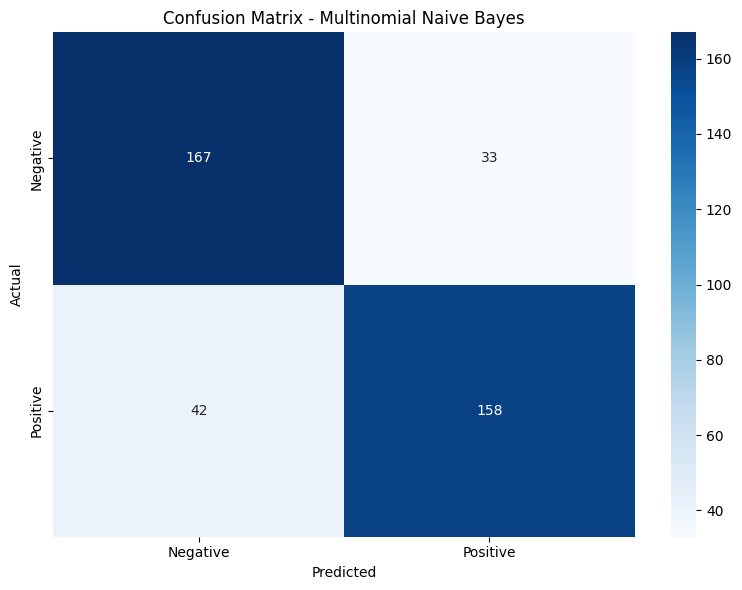

In [118]:
# Predict test categories
# Compute accuracy, classification report, and show confusion matrix

# ============================================================================
# EVALUATE MODEL 1 - Naive Bayes
# ============================================================================

print("\n[9] Evaluating Multinomial Naive Bayes performance...")

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"\nOverall Accuracy: {nb_accuracy:.4f} ({nb_accuracy*100:.2f}%)")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb,
                          target_names=['Negative', 'Positive'],
                          digits=4))

# Confusion matrix
nb_cm = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(nb_cm)
print("\nConfusion Matrix Interpretation:")
print(f"True Negatives:  {nb_cm[0][0]} (Correctly predicted negative)")
print(f"False Positives: {nb_cm[0][1]} (Incorrectly predicted positive)")
print(f"False Negatives: {nb_cm[1][0]} (Incorrectly predicted negative)")
print(f"True Positives:  {nb_cm[1][1]} (Correctly predicted positive)")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
#plt.savefig('nb_confusion_matrix.png', dpi=100, bbox_inches='tight')
#print("\nConfusion matrix saved as 'nb_confusion_matrix.png'")
#plt.close()
plt.show()


In [119]:
# Define and fit second classifier model
# ============================================================================
# MODEL 2: LOGISTIC REGRESSION
# ============================================================================

print("\n" + "=" * 80)
print("MODEL 2: LOGISTIC REGRESSION")
print("=" * 80)

print("\n[10] Training Logistic Regression classifier...")

# Define the model
lr_classifier = LogisticRegression(
    max_iter=1000,          # Maximum iterations for convergence
    C=1.0,                  # Regularization strength (inverse)
    random_state=42,
    solver='lbfgs'          # Optimization algorithm
)

# Fit the model
lr_classifier.fit(X_train_tfidf, y_train)

print("Logistic Regression model trained successfully!")
print(f"Number of iterations: {lr_classifier.n_iter_[0]}")
print(f"Coefficients shape: {lr_classifier.coef_.shape}")

# Display most predictive features
coefficients = lr_classifier.coef_[0]
top_positive_indices = coefficients.argsort()[-15:][::-1]
top_negative_indices = coefficients.argsort()[:15]

print("\nTop 15 most positive features (indicative of positive reviews):")
for idx in top_positive_indices:
    print(f"  {feature_names[idx]}: {coefficients[idx]:.4f}")

print("\nTop 15 most negative features (indicative of negative reviews):")
for idx in top_negative_indices:
    print(f"  {feature_names[idx]}: {coefficients[idx]:.4f}")

# ============================================================================
# PREDICT WITH MODEL 2
# ============================================================================

print("\n[11] Making predictions with Logistic Regression...")

# Predict on test set
y_pred_lr = lr_classifier.predict(X_test_tfidf)

print(f"Predictions made for {len(y_pred_lr)} test samples")



MODEL 2: LOGISTIC REGRESSION

[10] Training Logistic Regression classifier...
Logistic Regression model trained successfully!
Number of iterations: 8
Coefficients shape: (1, 5000)

Top 15 most positive features (indicative of positive reviews):
  and: 2.4317
  is: 1.4492
  great: 1.4155
  very: 1.3543
  war: 1.2945
  also: 1.1828
  performance: 1.1497
  life: 1.0817
  alien: 1.0243
  truman: 1.0075
  most: 1.0034
  excellent: 0.9962
  the: 0.9802
  jackie: 0.9346
  perfect: 0.9292

Top 15 most negative features (indicative of negative reviews):
  bad: -2.8452
  worst: -1.6846
  to: -1.5963
  have: -1.5954
  plot: -1.4898
  only: -1.3851
  no: -1.3553
  boring: -1.3436
  nothing: -1.3218
  script: -1.2821
  this: -1.2061
  why: -1.1628
  supposed: -1.1230
  attempt: -1.0975
  any: -1.0616

[11] Making predictions with Logistic Regression...
Predictions made for 400 test samples



[12] Evaluating Logistic Regression performance...

Overall Accuracy: 0.8175 (81.75%)

Classification Report:
              precision    recall  f1-score   support

    Negative     0.8325    0.7950    0.8133       200
    Positive     0.8038    0.8400    0.8215       200

    accuracy                         0.8175       400
   macro avg     0.8181    0.8175    0.8174       400
weighted avg     0.8181    0.8175    0.8174       400

Confusion Matrix:
[[159  41]
 [ 32 168]]

Confusion Matrix Interpretation:
True Negatives:  159 (Correctly predicted negative)
False Positives: 41 (Incorrectly predicted positive)
False Negatives: 32 (Incorrectly predicted negative)
True Positives:  168 (Correctly predicted positive)


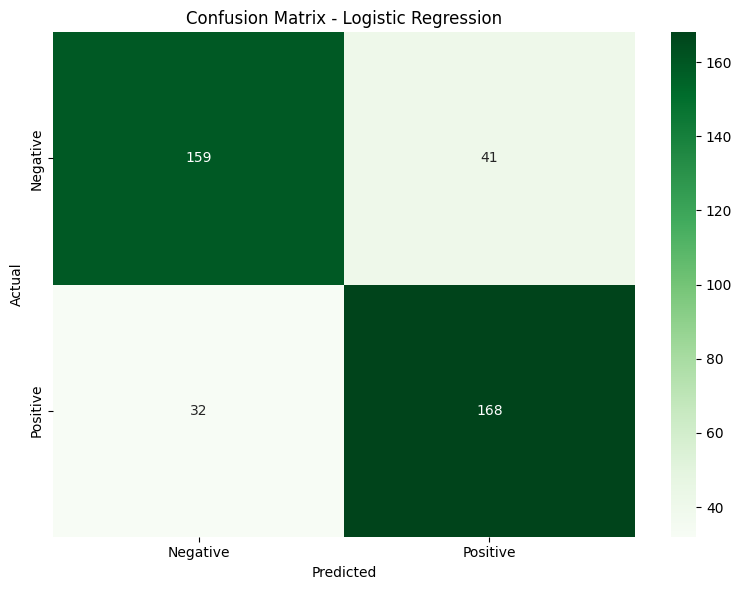

In [120]:
# Predict test categories
# Compute accuracy, classification report, and show confusion matrix

# ============================================================================
# EVALUATE MODEL 2 - Logistic Regression
# ============================================================================

print("\n[12] Evaluating Logistic Regression performance...")

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"\nOverall Accuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr,
                          target_names=['Negative', 'Positive'],
                          digits=4))

# Confusion matrix
lr_cm = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(lr_cm)
print("\nConfusion Matrix Interpretation:")
print(f"True Negatives:  {lr_cm[0][0]} (Correctly predicted negative)")
print(f"False Positives: {lr_cm[0][1]} (Incorrectly predicted positive)")
print(f"False Negatives: {lr_cm[1][0]} (Incorrectly predicted negative)")
print(f"True Positives:  {lr_cm[1][1]} (Correctly predicted positive)")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('lr_confusion_matrix.png', dpi=100, bbox_inches='tight')
#print("\nConfusion matrix saved as 'lr_confusion_matrix.png'")
#plt.close()
plt.show()


In [121]:
# Define and fit third ( additional ) classifier model
# ============================================================================
# MODEL 3: SVC
# ============================================================================

from sklearn.svm import SVC

print("\n" + "=" * 80)
print("MODEL 3: SUPPORT VECTOR CLASSIFIER")
print("=" * 80)

print("\n[13] Training Support Vector Classifier...")

# Initialize the model
svc_classifier = SVC(
    random_state=42,
    max_iter=1000, # Set max_iter for faster convergence
    kernel='linear' # 'linear' kernel often works well for text classification and is faster than 'rbf' for large datasets
)

# Fit the model
svc_classifier.fit(X_train_tfidf, y_train)

print("Support Vector Classifier model trained successfully!")
print(f"Number of classes: {len(svc_classifier.classes_)}")
print(f"Classes: {svc_classifier.classes_}")


MODEL 3: SUPPORT VECTOR CLASSIFIER

[13] Training Support Vector Classifier...
Support Vector Classifier model trained successfully!
Number of classes: 2
Classes: ['neg' 'pos']


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [122]:
# ============================================================================
# PREDICT WITH MODEL 3 - SVC
# ============================================================================

print("\n[14] Making predictions with Support Vector Classifier...")

# Predict on test set
y_pred_svc = svc_classifier.predict(X_test_tfidf)

print(f"Predictions made for {len(y_pred_svc)} test samples")


[14] Making predictions with Support Vector Classifier...
Predictions made for 400 test samples



MODEL 3: SUPPORT VECTOR CLASSIFIER - EVALUATION

[15] Evaluating Support Vector Classifier performance...

Overall Accuracy: 0.8425 (84.25%)

Classification Report:
              precision    recall  f1-score   support

    Negative     0.8703    0.8050    0.8364       200
    Positive     0.8186    0.8800    0.8482       200

    accuracy                         0.8425       400
   macro avg     0.8444    0.8425    0.8423       400
weighted avg     0.8444    0.8425    0.8423       400

Confusion Matrix:
[[161  39]
 [ 24 176]]

Confusion Matrix Interpretation:
True Negatives:  161 (Correctly predicted negative)
False Positives: 39 (Incorrectly predicted positive)
False Negatives: 24 (Incorrectly predicted negative)
True Positives:  176 (Correctly predicted positive)


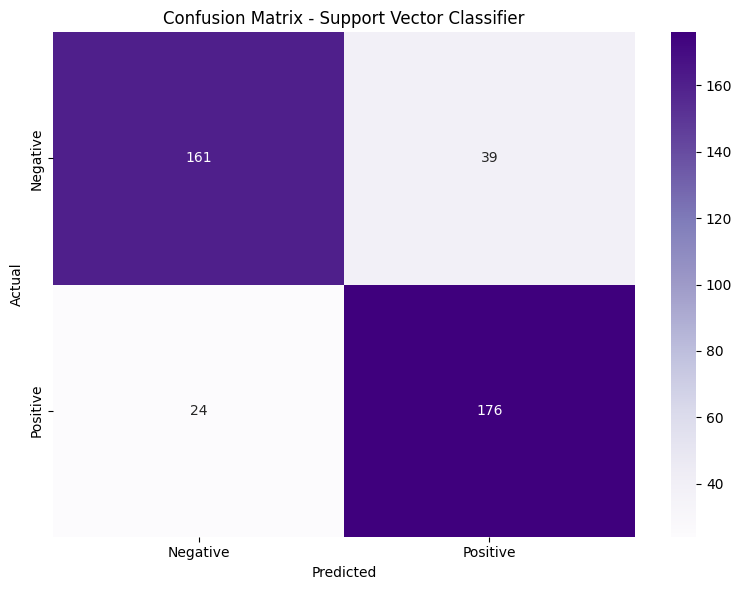

In [123]:
# ============================================================================
# EVALUATE MODEL 3 - SVC
# ============================================================================

print(
    "\n" + "=" * 80 +
    "\nMODEL 3: SUPPORT VECTOR CLASSIFIER - EVALUATION" +
    "\n" + "=" * 80
)

print("\n[15] Evaluating Support Vector Classifier performance...")

# Calculate accuracy
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(f"\nOverall Accuracy: {svc_accuracy:.4f} ({svc_accuracy*100:.2f}%)")

# Classification report
print("\nClassification Report:")
print(classification_report(
    y_test, y_pred_svc,
    target_names=['Negative', 'Positive'],
    digits=4
))

# Confusion matrix
svc_cm = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:")
print(svc_cm)
print("\nConfusion Matrix Interpretation:")
print(f"True Negatives:  {svc_cm[0][0]} (Correctly predicted negative)")
print(f"False Positives: {svc_cm[0][1]} (Incorrectly predicted positive)")
print(f"False Negatives: {svc_cm[1][0]} (Incorrectly predicted negative)")
print(f"True Positives:  {svc_cm[1][1]} (Correctly predicted positive)")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Support Vector Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [124]:
# ============================================================================
# Compare Models Performance
# ============================================================================


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# --- Extract metrics for each model ---

# Multinomial Naive Bayes (MNB) metrics
nb_report = classification_report(y_test, y_pred_nb, output_dict=True, target_names=['Negative', 'Positive'])
nb_metrics = {
    'Model': 'Multinomial Naive Bayes',
    'Accuracy': nb_accuracy,
    'Precision (Neg)': nb_report['Negative']['precision'],
    'Recall (Neg)': nb_report['Negative']['recall'],
    'F1-Score (Neg)': nb_report['Negative']['f1-score'],
    'Precision (Pos)': nb_report['Positive']['precision'],
    'Recall (Pos)': nb_report['Positive']['recall'],
    'F1-Score (Pos)': nb_report['Positive']['f1-score']
}

# Logistic Regression (LR) metrics
lr_report = classification_report(y_test, y_pred_lr, output_dict=True, target_names=['Negative', 'Positive'])
lr_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': lr_accuracy,
    'Precision (Neg)': lr_report['Negative']['precision'],
    'Recall (Neg)': lr_report['Negative']['recall'],
    'F1-Score (Neg)': lr_report['Negative']['f1-score'],
    'Precision (Pos)': lr_report['Positive']['precision'],
    'Recall (Pos)': lr_report['Positive']['recall'],
    'F1-Score (Pos)': lr_report['Positive']['f1-score']
}

# Support Vector Classifier (SVC) metrics
svc_report = classification_report(y_test, y_pred_svc, output_dict=True, target_names=['Negative', 'Positive'])
svc_metrics = {
    'Model': 'Support Vector Classifier',
    'Accuracy': svc_accuracy,
    'Precision (Neg)': svc_report['Negative']['precision'],
    'Recall (Neg)': svc_report['Negative']['recall'],
    'F1-Score (Neg)': svc_report['Negative']['f1-score'],
    'Precision (Pos)': svc_report['Positive']['precision'],
    'Recall (Pos)': svc_report['Positive']['recall'],
    'F1-Score (Pos)': svc_report['Positive']['f1-score']
}

# Create a DataFrame for all metrics
metrics_df = pd.DataFrame([nb_metrics, lr_metrics, svc_metrics])
display(metrics_df)


,Model,Accuracy,Precision (Neg),Recall (Neg),F1-Score (Neg),Precision (Pos),Recall (Pos),F1-Score (Pos)
0,Multinomial Naive Bayes,0.8125,0.799043,0.835,0.816626,0.827225,0.79,0.808184
1,Logistic Regression,0.8175,0.832461,0.795,0.813299,0.803828,0.84,0.821516
2,Support Vector Classifier,0.8425,0.870270,0.805,0.836364,0.818605,0.88,0.848193


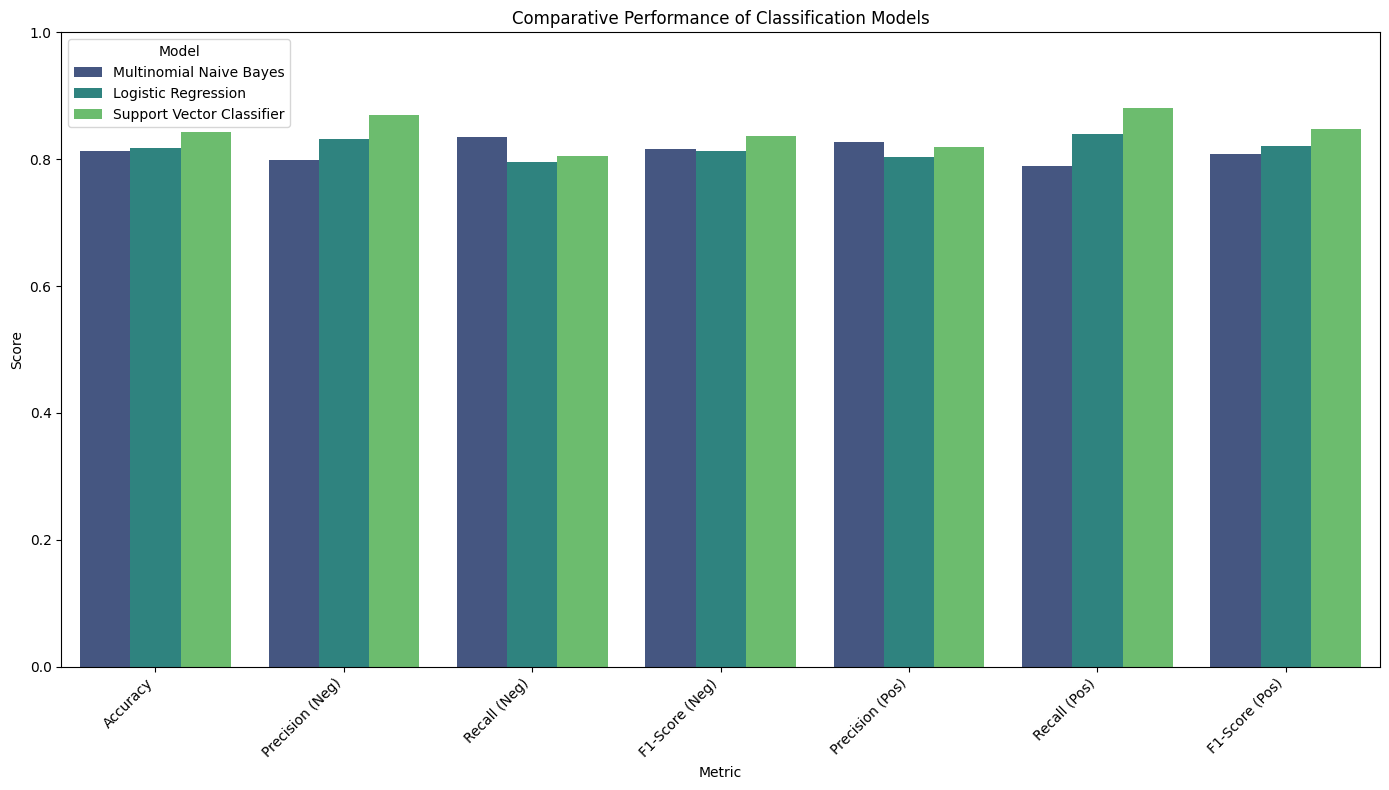

In [125]:
# ============================================================================
# Plot models performance
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrame for plotting
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Define the order of metrics to display
metric_order = [
    'Accuracy',
    'Precision (Neg)', 'Recall (Neg)', 'F1-Score (Neg)',
    'Precision (Pos)', 'Recall (Pos)', 'F1-Score (Pos)'
]
metrics_melted['Metric'] = pd.Categorical(metrics_melted['Metric'], categories=metric_order, ordered=True)
metrics_melted = metrics_melted.sort_values('Metric')

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=metrics_melted, x='Metric', y='Score', hue='Model', palette='viridis')
plt.title('Comparative Performance of Classification Models')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1) # Metrics are between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model')
plt.tight_layout()
plt.show()


**Summary of Classifier Performance**

We have trained and evaluated three different classifiers for movie review sentiment analysis:

1. Multinomial Naive Bayes (MNB)
2. Logistic Regression (LR)
3. Support Vector Classifier (SVC)

Let's compare their performance based on the overall accuracy, precision, recall, and F1-score from their respective classification reports and confusion matrices.

**Performance Metrics:**

* **Multinomial Naive Bayes (MNB)**:

  * Overall Accuracy: 0.8125 (81.25%)
  * Precision (Negative): 0.7990
  * Recall (Negative): 0.8350
  * F1-Score (Negative): 0.8166
  * Precision (Positive): 0.8272
  * Recall (Positive): 0.7900
  * F1-Score (Positive): 0.8082
  * Confusion Matrix: True Negatives: 167, False Positives: 33,False Negatives: 42,True Positives: 158

* **Logistic Regression (LR)**:

  * Overall Accuracy: 0.8175 (81.75%)
  * Precision (Negative): 0.8325
  * Recall (Negative): 0.7950
  * F1-Score (Negative): 0.8133
  * Precision (Positive): 0.8038
  * Recall (Positive): 0.8400
  * F1-Score (Positive): 0.8215
  * Confusion Matrix: True Negatives: 159, False Positives: 41, False Negatives: 32, True Positives: 168
  
* **Support Vector Classifier (SVC)**:

  * Overall Accuracy: 0.8425 (84.25%)
  * Precision (Negative): 0.8703
  * Recall (Negative): 0.8050
  * F1-Score (Negative): 0.8364 (Approximate, from report: 0.8364)
  * Precision (Positive): 0.8186
  * Recall (Positive): 0.8800
  * F1-Score (Positive): 0.8482 (Approximate, from report: 0.8482)
  * Confusion Matrix: True Negatives: 161, False Positives: 39, False Negatives: 24, True Positives: 176

**Comparative Analysis**:

From the results, we can observe:

**Overall Accuracy**:
The SVC model achieved the highest accuracy (84.25%), followed closely by Logistic Regression (81.75%), and then Multinomial Naive Bayes (81.25%). This suggests that for this dataset and feature representation, the more complex models (LR and SVC) perform better than the simpler MNB.

**Precision and Recall**:
MNB shows a slightly better recall for negative reviews (0.8350) but lower precision (0.7990) compared to positive reviews. This indicates it's good at identifying negative reviews, but might misclassify some positive reviews as negative.
LR has slightly higher precision for negative reviews (0.8325) and higher recall for positive reviews (0.8400). It generally shows a balanced performance between the two classes.
SVC achieved the highest F1-scores for both classes, indicating a good balance of precision and recall. It has the highest recall for positive reviews (0.8800) and also strong precision for negative reviews (0.8703). The SVC model also has the fewest False Negatives (24), meaning it's very good at not missing positive reviews.

**Confusion Matrix**:
SVC has the lowest number of False Negatives (24), meaning it incorrectly classified the fewest positive reviews as negative. It also has a competitive number of True Positives (176).
MNB had the highest number of False Negatives (42), suggesting it struggled most with identifying positive reviews.

In conclusion, the Support Vector Classifier (SVC) generally performed the best among the three models based on overall accuracy and balanced F1-scores for both classes. Logistic Regression was a close second, offering robust performance. Multinomial Naive Bayes, while providing a decent baseline, was outperformed by the other two models.